In [48]:
# Yi-Hsuan Hsu
# 2020-03-02
# CS301-006, Watson
# Homework05
# Repo: https://github.com/bigyihsuan/CS301-HW/
# Commit: a324853d8fc787fc092cc396b8a3def56655fa76

In [285]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("student_class.csv", index_col=0)
df

,Name,Midterm,Final,Attendance,HW,Final Average,Final Letter,Numeric Bin,Majors
0,Ariel,89,92,9,9,86.0,B+,80.0,BNFO
1,Brody,92,93,10,9,89.0,A,80.0,BNFO
2,Debra,76,88,8,6,74.0,C+,70.0,MATH
3,Rex,90,83,10,10,88.0,B+,80.0,MATH
4,Jerry,67,85,7,5,66.0,D,60.0,BNFO
...,...,...,...,...,...,...,...,...,...
145,Nicole,97,96,9,8,86.7,B+,80.0,MATH
146,Duncan,99,98,10,8,90.2,A,90.0,BNFO
147,Hope,96,92,10,9,89.8,A,80.0,IT
148,Kiara,93,91,10,10,90.9,A,90.0,CS


# Problem 1

In [286]:
df.describe()

,Midterm,Final,Attendance,HW,Final Average,Numeric Bin
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,80.906667,78.426667,8.260000,6.920000,74.128000,69.733333
std,13.681588,14.691159,1.462874,2.523766,10.507959,10.865046
min,52.000000,50.000000,3.000000,2.000000,47.000000,40.000000
25%,71.000000,67.000000,7.250000,5.000000,66.975000,60.000000
50%,83.000000,81.000000,8.000000,7.000000,74.000000,70.000000
75%,93.000000,92.000000,9.000000,9.000000,83.875000,80.000000
max,100.000000,100.000000,10.000000,10.000000,93.600000,90.000000


In [287]:
majors = df["Majors"].unique()
majors

array(['BNFO', 'MATH', 'IS', 'CS', 'IT'], dtype=object)

In [289]:
df.groupby("Majors").agg(np.median)

,Midterm,Final,Attendance,HW,Final Average,Numeric Bin
Majors,,,,,,
BNFO,87.5,90.5,9.0,7.0,75.05,70.0
CS,82.0,74.5,8.0,8.0,72.70,70.0
IS,73.0,81.0,8.0,6.0,71.80,70.0
IT,82.5,80.5,8.0,8.0,74.80,70.0
MATH,84.5,80.5,8.5,8.0,74.30,70.0


In [290]:
midterms = df.groupby("Majors").agg(np.median)["Midterm"]
midterms

Majors
BNFO    87.5
CS      82.0
IS      73.0
IT      82.5
MATH    84.5
Name: Midterm, dtype: float64

In [291]:
finals = df.groupby("Majors").agg(np.median)["Final"]
finals

Majors
BNFO    90.5
CS      74.5
IS      81.0
IT      80.5
MATH    80.5
Name: Final, dtype: float64

In [292]:
finavg = df.groupby("Majors").agg(np.median)["Final Average"]
finavg

Majors
BNFO    75.05
CS      72.70
IS      71.80
IT      74.80
MATH    74.30
Name: Final Average, dtype: float64

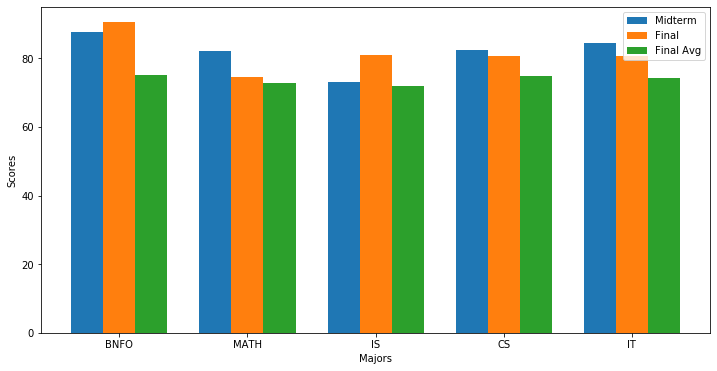

In [293]:
x = np.arange(len(majors))
width = 0.25

fig, plot = plt.subplots()
mid = plot.bar(x - width, midterms, width, Label="Midterm")
fin = plot.bar(x, finals, width, Label="Final")
avg = plot.bar(x + width, finavg, width, Label="Final Average")

plt.gcf().set_size_inches(12, 6)
plot.set_xlabel("Majors")
plot.set_ylabel("Scores")
plot.set_xticks(x)
plot.set_xticklabels(majors)
plot.legend(handles=[mid,fin,avg], labels=["Midterm", "Final", "Final Avg"], loc="upper right")

In general, BNFO majors seem to be performing the best. I think so because of their bars being longer than everyone else's.

# Problem 2

In [326]:
numbin = df["Numeric Bin"]
numbin

0      80.0
1      80.0
2      70.0
3      80.0
4      60.0
       ... 
145    80.0
146    90.0
147    80.0
148    90.0
149    80.0
Name: Numeric Bin, Length: 150, dtype: float64

(array([ 1.,  0., 16.,  0., 30.,  0., 48.,  0., 49.,  6.]),
 array([40., 45., 50., 55., 60., 65., 70., 75., 80., 85., 90.]),
 <a list of 10 Patch objects>)

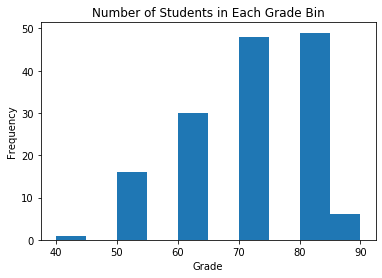

In [332]:
fig, ax = plt.subplots()
ax.set_xlabel('Grade')
ax.set_ylabel('Frequency')
ax.set_title("Number of Students in Each Grade Bin")
ax.hist(numbin)

* Data items: frequency of each grade range.
* Attributes: Quantitative
* Marks: Bar length
* Channels: Difference in length
I would not change anything with the graph, other than add in a legend.
The distribution is skewed to the right.

# Problem 3

In [333]:
midterms = df['Midterm']
midterms

0      89
1      92
2      76
3      90
4      67
       ..
145    97
146    99
147    96
148    93
149    95
Name: Midterm, Length: 150, dtype: int64

In [338]:
finals = df['Final']
finals

0      92
1      93
2      88
3      83
4      85
       ..
145    96
146    98
147    92
148    91
149    82
Name: Final, Length: 150, dtype: int64

In [339]:
finavg = df['Final Average']
finavg

0      86.0
1      89.0
2      74.0
3      88.0
4      66.0
       ... 
145    86.7
146    90.2
147    89.8
148    90.9
149    86.1
Name: Final Average, Length: 150, dtype: float64

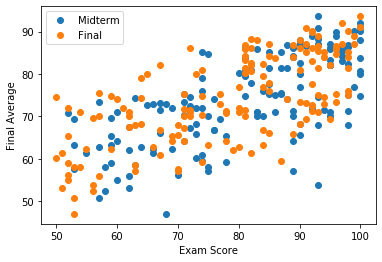

In [344]:
fig, plot = plt.subplots()
plot.plot(midterms, finavg, 'o', label='Midterm')
plot.plot(finals, finavg, 'o', label='Final')
plot.set_xlabel('Exam Score')
plot.set_ylabel('Final Average')
plot.legend()

* Data Items: Exam score and Final average
* Attributes: quantitative
* Marks and channels: Points
There is a correlation between higher exam scores leading to higher final averages, but there is a large spread and thus a somewhat weak correlation.